In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# Contesto e obiettivo del modello
In dataset utilizzato contiene vari dati riguardanti la salute e lo stile di vita dei soggetti che hanno partecipato a un sondaggio che viene svolto ogni anno in America, il BRFSS.
L'obiettivo del modello è quello di predire l'insorgenza del diabete, ossia una variabile discreta binaria. 


In [3]:
dataset = pd.read_csv("diabetes_binary_5050split_health_indicators_BRFSS2015.csv", sep=",")

# Data Exploration

In [4]:
dataset.head()


,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


In [5]:
len(dataset)

70692

# Descrizione delle variabili contenute nel dataset in esame
- Diabetes_binary: variabile binaria con valore 1 se il soggetto ha prediabete o diabete, 0 altrimenti. 
- HighBP: variabile binaria con valore 1 se il soggetto ha la pressione arteriosa alta, 0 altrimenti.
- HighChol: variabile binaria con valore 1 se il soggetto ha il colesterolo alto, 0 altrimenti.
- CholCheck: variabile binaria che ha valore 1 se il soggetto ha effettuato un controllo del colesterolo negli ultimi 5 anni, 0 altrimenti.
- BMI: variabile che indica l'indice di massa corporea, ossia il parametro più utilizzato in campo medico per valutare l'entità del peso corporeo di un soggetto.
- Smoker: variabile binaria che vale 1 se il soggetto ha fumato almeno 100 sigarette (5 pacchetti) nel corso della sua vita, indipendentemente dal fatto che sia attualmente un fumatore o meno.
- Stroke: variabile binaria che vale 1 se il soggetto ha avuto un ictus, 0 altrimenti.
- HeartDiseaseorAttack: variabile binaria che vale 1 se il soggetto è affetto da Cardiopatia Coronarica (CHD) o se ha avuto un infarto, 0 altrimenti.
- PhysActivity: variabile binaria che vale 1 se il soggetto ha effettuato attività fisica (lavoro escluso) negli ultimi 30 giorni, 0 altrimenti.
- Fruits: variabile binaria che vale 1 se il soggetto di solito consuma almeno una porzione di frutta al giorno, 0 altrimenti.
- Veggies: 	variabile binaria che vale 1 se il soggetto di solito consuma almeno una porzione di verdura al giorno, 0 altrimenti.
- HvyAlcoholConsump: variabile binaria che vale 1 se il soggetto ha un alto consumo di alcol (nello specifico: uomo che di solito beve più di 14 drink a settimana o una donna che beve più di 7 drink a settimana).
- AnyHealthcare: variabile binaria che vale 1 se il soggetto è in possesso di una copertura sanitaria (es. assicurazione o qualcosa di questo tipo). 
- NoDocbcCost: variabile binaria che vale 1 se il soggetto negli ultimi 12 mesi ha rinunciato almeno una volta a un consulto medico a causa del costo.
- GenHlth: variabile che assume valori da 1 a 5 e che corrispondere alla valutazione data dal soggetto riguardo al suo stato di salute (1 = eccellente, 2 = molto buono, 3 = buono, 4 = discreto, 5 = scarso)
- MentHlth: variabile che assume valori da 1 a 30 e che corrisponde ai giorni in cui la salute mentale del soggetto era compromessa (stress, depressione, ansia...) negli ultimi 30 giorni, secondo l'opinione del soggetto stesso.
- PhysHlth: variabile che indica per quanti giorni (negli ultimi 30 giorni) la salute fisica del soggetto non è stata molto buona (malattia, infortuni ...).	
- DiffWalk: variabile binaria che vale 1 se il soggetto ha serie difficoltà a camminare o a fare le scale, 0 altrimenti.
- Sex: variabile binaria che vale 1 se il soggetto è un uomo, 0 se è una donna.
- Age: variabile che assume valori da 1 a 13 in base alla classe d'età a cui appartiene il soggetto (es. 1 = 18-24 anni, 2 = 25-29 anni, ..., 12 = 75-79 anni, 13 = 80 anni o più).	
- Education: variabile che assume valori da 1 a 6 e indica il livello di istruzione (1 = mai frequentato una scuola, 2 = scuola elementare, 3 = scuola media, 4 = scuola superiore, 5 = università da 1 a 3 anni , 6 = università 4 o più anni).
- Income: variabile che rappresenta il reddito del soggetto in una scala da 1 a 8 (1 = meno di $10,000, 5 = meno di $35,000, 8 = $75,000 o più).

In [6]:
for name, array in dataset.items():
    print(name, array.dtype, array.shape)

Diabetes_binary float64 (70692,)
HighBP float64 (70692,)
HighChol float64 (70692,)
CholCheck float64 (70692,)
BMI float64 (70692,)
Smoker float64 (70692,)
Stroke float64 (70692,)
HeartDiseaseorAttack float64 (70692,)
PhysActivity float64 (70692,)
Fruits float64 (70692,)
Veggies float64 (70692,)
HvyAlcoholConsump float64 (70692,)
AnyHealthcare float64 (70692,)
NoDocbcCost float64 (70692,)
GenHlth float64 (70692,)
MentHlth float64 (70692,)
PhysHlth float64 (70692,)
DiffWalk float64 (70692,)
Sex float64 (70692,)
Age float64 (70692,)
Education float64 (70692,)
Income float64 (70692,)


Variabile target: Diabetes_binary 

Variabili categoriche: HighBP, HighChol, CholCheck,  Smoker, Stroke, HeartDiseaseorAttack, PhysActivity, Fruits, Veggies, HvyAlcoholConsump,  AnyHealthcare, NoDocbcCost, DiffWalk, Sex.

Variabili continue: BMI, GenHlth, MentHlth, PhysHlth, Age, Education, Income.



Siccome non c'è una colonna che svolge ruolo di chaive primaria, mi creo un vettore contenente i numeri di riga, lo aggiungo al mio data frame e lo uso come indice. 

In [7]:
dataset['id'] = range(0,70692)
dataset.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,id
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0,0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0,1
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0,2
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0,3
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0,4


In [8]:
dataset = dataset.set_index('id')
dataset.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
id,,,,,,,,,,,,,,,,,,,,,
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


Grazie al metodo describe posso ottenere rapidamente tutte le statistiche riguardanti il mio dataset: 

In [9]:
dataset.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,...,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000
mean,0.500000,0.563458,0.525703,0.975259,29.856985,0.475273,0.062171,0.147810,0.703036,0.611795,...,0.954960,0.093914,2.837082,3.752037,5.810417,0.252730,0.456997,8.584055,4.920953,5.698311
std,0.500004,0.495960,0.499342,0.155336,7.113954,0.499392,0.241468,0.354914,0.456924,0.487345,...,0.207394,0.291712,1.113565,8.155627,10.062261,0.434581,0.498151,2.852153,1.029081,2.175196
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,7.000000,4.000000,4.000000
50%,0.500000,1.000000,1.000000,1.000000,29.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,9.000000,5.000000,6.000000
75%,1.000000,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,4.000000,2.000000,6.000000,1.000000,1.000000,11.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


# Rilevazione di valori nulli e dati non rilevanti
Procedo verificando se ci sono valori nulli e nel caso li andrò a sostituire con valori medi che non comprometterebbero le operazioni sui dati. Inoltrè rimuoverò anche eventuali colonne contenenti sempre lo stesso valore (per esempio se tra i dati raccolti, la colonna contenente i dati riguardati le porzioni di frutta giornaliere ha tutti valori uguali a 1, ha senso rimuoverla poichè irrilevante in questo caso).

In [11]:
dataset.isna().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

Dal risultato ottenuto possiamo notare che nel dataset non sono presenti valori nulli, quindi non sarà necessario effettuale alcuna sostituzione.
Dalla media calcolata su ciascuna variabile precedentemente, deduco che non sia necessario eliminare alcuna colonna (le colonne delle variabili binarie per esempio non hanno mai media 0 o 1).

# Analisi della distribuzione delle variabili tramite grafici

Ho scelto un dataset in cui la variabile target è bilanciata e il grafico a torta sotto riportato ne è la conferma.

<Axes: ylabel='count'>

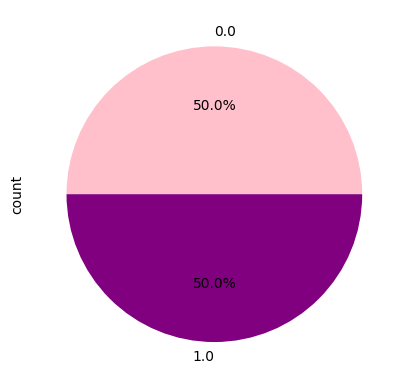

In [10]:
dataset['Diabetes_binary'].value_counts().plot.pie(autopct='%1.1f%%', colors=[ "pink", "purple" ])

Analisi delle variabile continue (BMI, GenHlth, MentHlth, PhysHlth, Age, Education, Income)

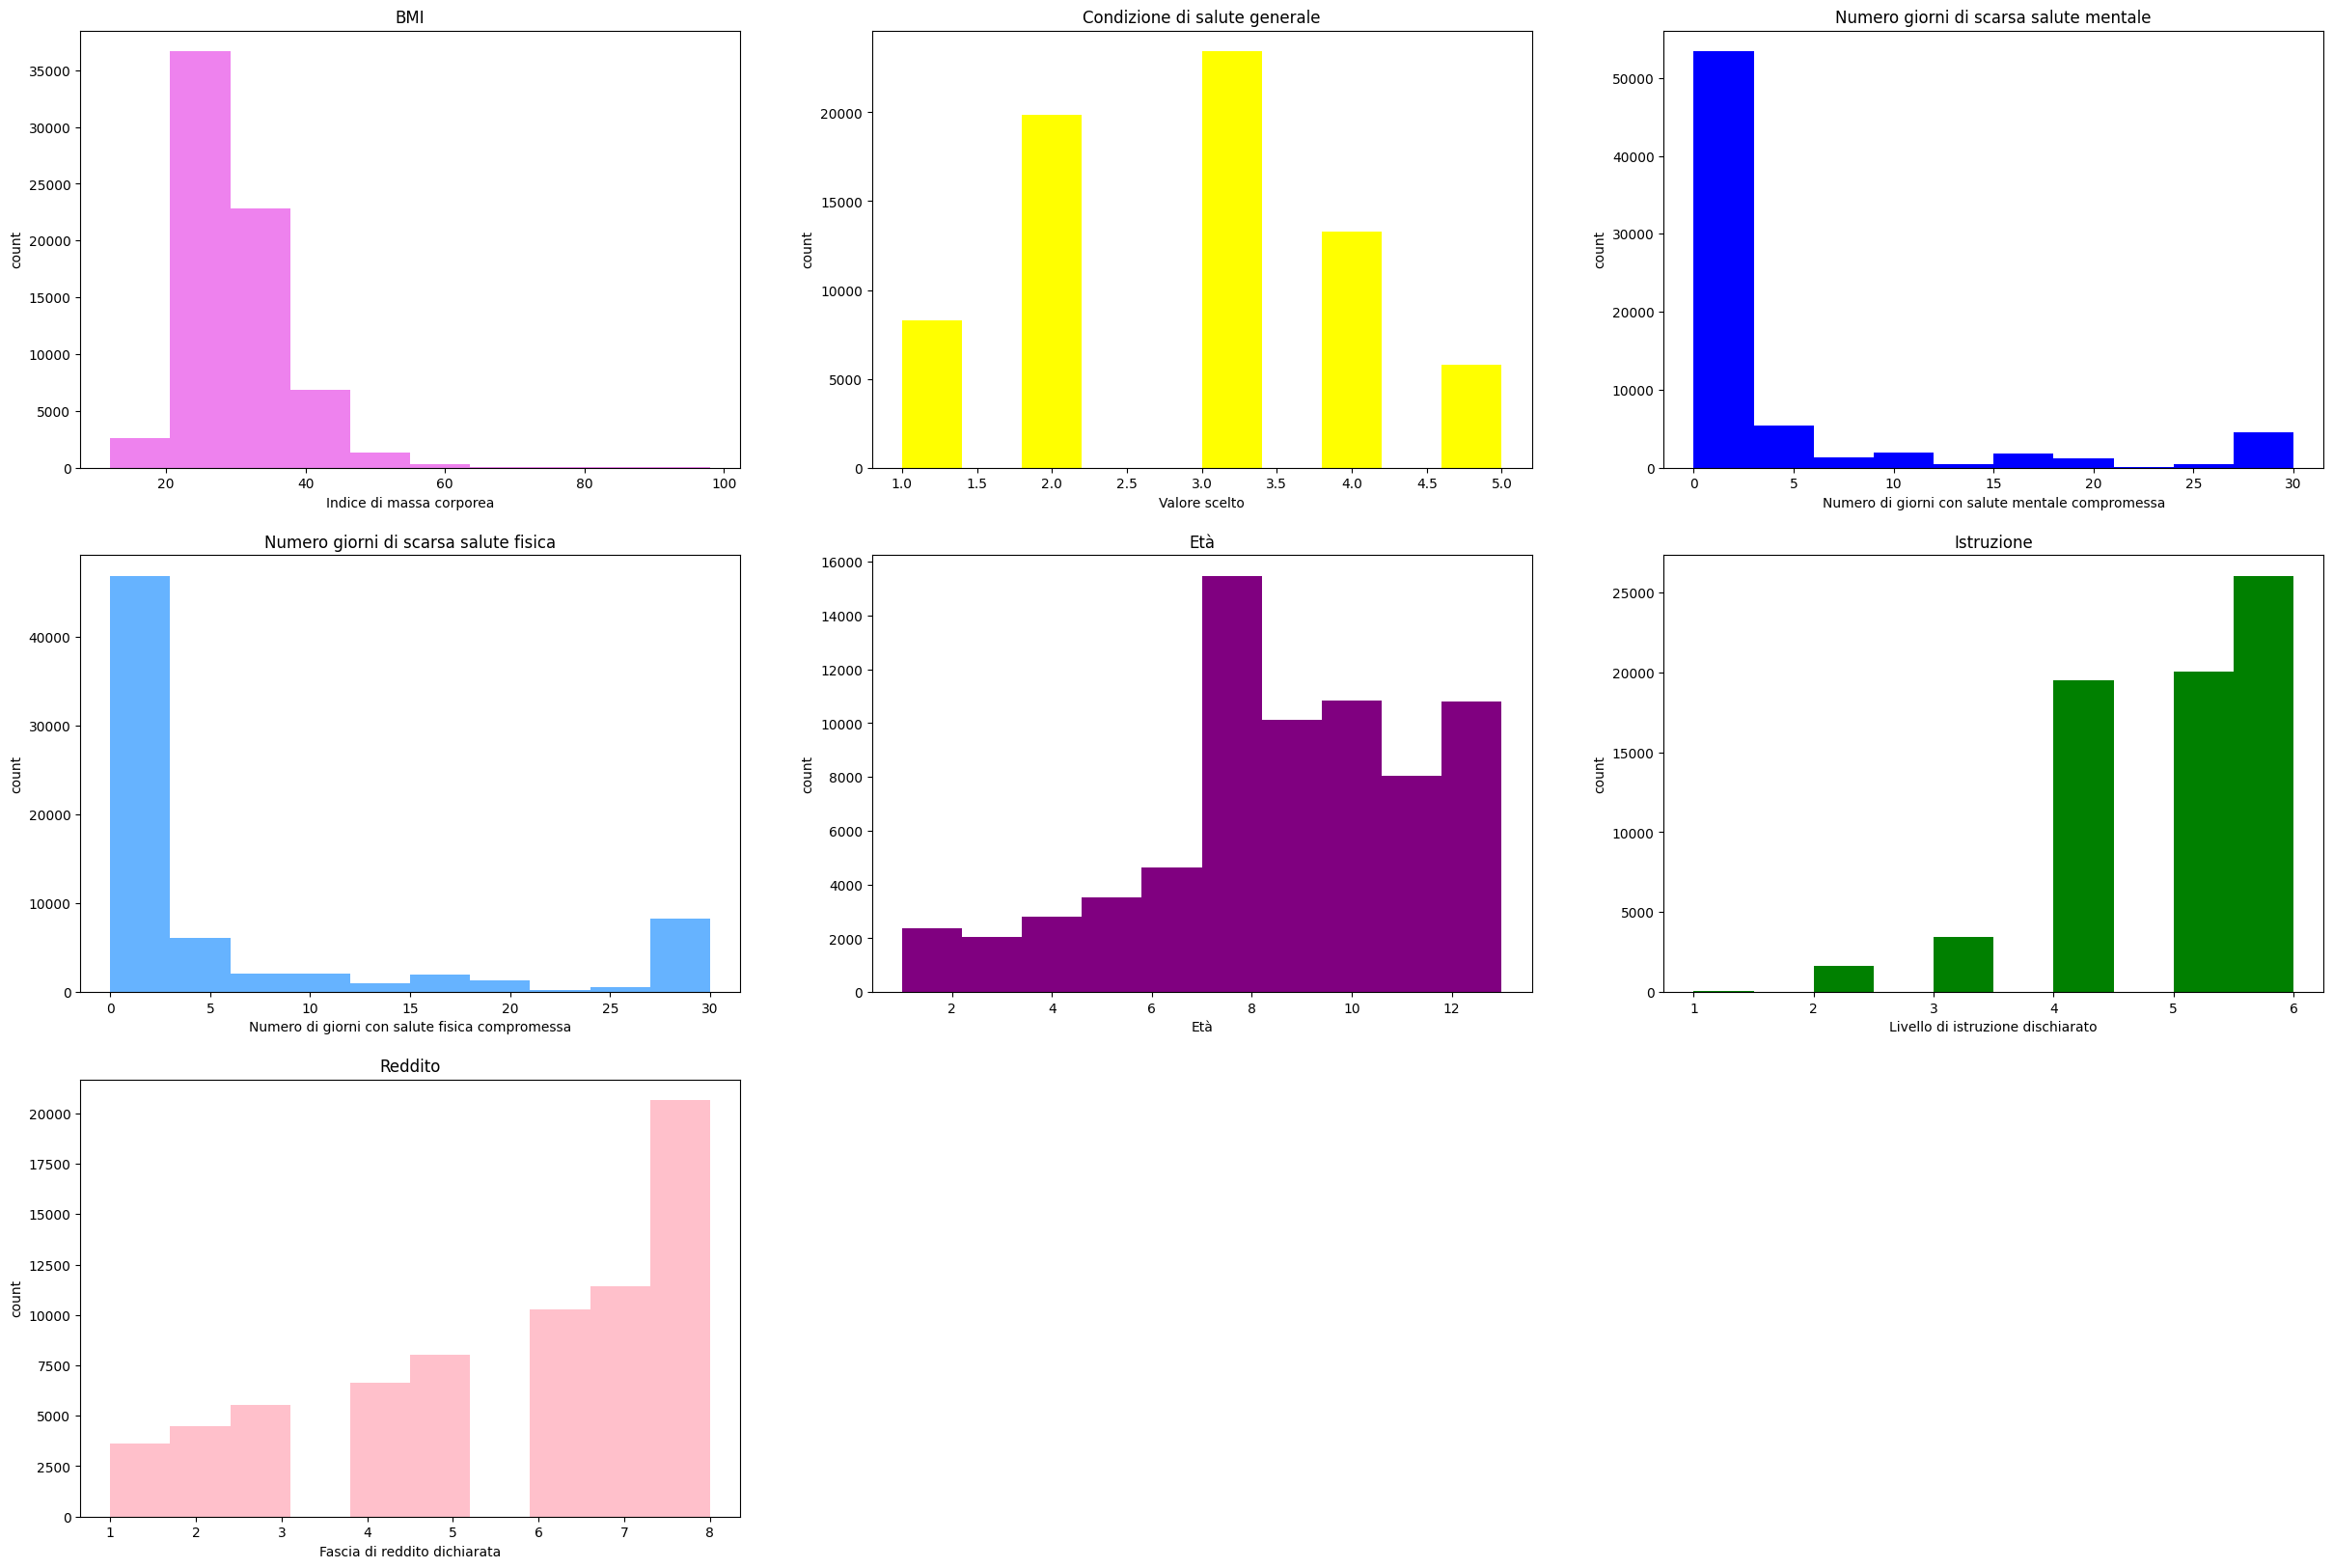

In [38]:
plt.figure(figsize=(30, 20))

plt.subplot(3, 3, 1)
plt.title('BMI')
plt.hist(dataset['BMI'], label="BMI", color='violet')
plt.ylabel('count')
plt.xlabel('Indice di massa corporea')

plt.subplot(3, 3, 2)
plt.title('Condizione di salute generale')
plt.hist(dataset['GenHlth'], label="GenHlth", color='yellow')
plt.ylabel('count')
plt.xlabel('Valore scelto')

plt.subplot(3, 3, 3)
plt.title('Numero giorni di scarsa salute mentale')
plt.hist(dataset['MentHlth'], label="MentHlth", color='blue')
plt.ylabel('count')
plt.xlabel('Numero di giorni con salute mentale compromessa')

plt.subplot(3, 3, 4)
plt.title('Numero giorni di scarsa salute fisica')
plt.hist(dataset['PhysHlth'], label="PhysHlth", color='#66b3ff')
plt.ylabel('count')
plt.xlabel('Numero di giorni con salute fisica compromessa')


plt.subplot(3, 3, 5)
plt.title('Età')
plt.hist(dataset['Age'], label="Age", color='purple')
plt.ylabel('count')
plt.xlabel('Età')


plt.subplot(3, 3, 6)
plt.title('Istruzione')
plt.hist(dataset['Education'], label="Education", color='green')
plt.ylabel('count')
plt.xlabel('Livello di istruzione dischiarato')


plt.subplot(3, 3, 7)
plt.title('Reddito')
plt.hist(dataset['Income'], label="Income", color='pink')
plt.ylabel('count')
plt.xlabel('Fascia di reddito dichiarata')


plt.show()



BMI: notiamo che in generale la maggior parte dei soggetti ha un BMI che va da 20 a 40. Più precisamente possiamo verificare con un grafico a torta, quanti soggetti hanno un BMI più alto del normale (un soggetto normopeso di solito non supera la soglia del 25).

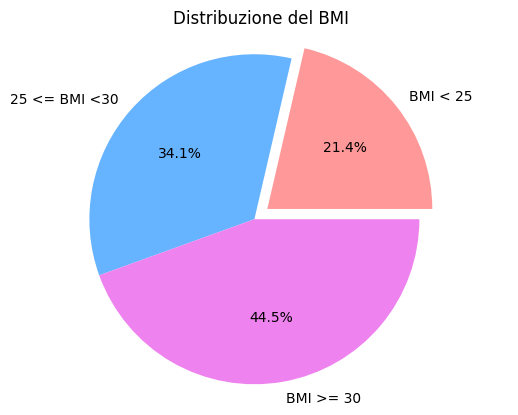

In [34]:
bmi_minore_di_25 = dataset[dataset['BMI'] < 25].shape[0]
bmi_da_25_a_30 = dataset[(dataset['BMI'] >= 25) & (dataset['BMI'] < 30)].shape[0]
bmi_maggiore_di_30 = dataset[dataset['BMI'] >= 30].shape[0]

plt.pie([bmi_minore_di_25, bmi_da_25_a_30, bmi_maggiore_di_30 ],explode = (0.1, 0, 0), labels = ['BMI < 25', '25 <= BMI <30', 'BMI >= 30'], colors = ['#ff9999','#66b3ff', 'violet'], autopct='%1.1f%%')
plt.axis('equal')  # Assicura che il grafico sia disegnato come un cerchio

plt.title('Distribuzione del BMI')
plt.show()

Dal grafico è evidente che solo una piccola parte (21.4%) dei soggetti coinvolti nel sondaggio sono normopeso. Il 34.1% rientra nella fascia dei soggetti sovrappeso, i restanti invece (44.5%) sono soggetti obesi.   

Condizione di salute generale: la maggioranza delle persone ritiene il proprio stato di salute buono. Vediamo in percentuale quanti sono i soggetti che ritengono il proprio stato di salute discreto/scarso mediante un grafico a torta. 

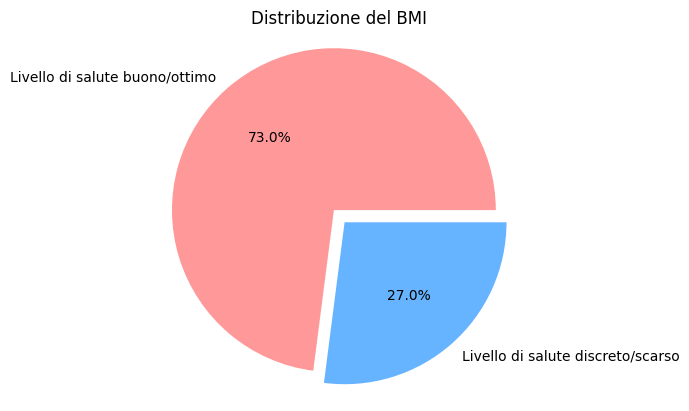

In [35]:
buona_salute = dataset[dataset['GenHlth'] < 4].shape[0]
scarsa_salute = dataset[dataset['GenHlth'] >= 4].shape[0]

plt.pie([buona_salute, scarsa_salute ],explode = (0.1, 0), labels = ['Livello di salute buono/ottimo', 'Livello di salute discreto/scarso'], colors = ['#ff9999','#66b3ff'], autopct='%1.1f%%')
plt.axis('equal')  # Assicura che il grafico sia disegnato come un cerchio

plt.title('Distribuzione del BMI')
plt.show()

Osserviamo quindi che circa 1/4 dei soggetti intervistati non ha un livello di salute generale buono. 

Livello di salute mentale: possiamo notare dall'istogramma che la grande maggioranza dei soggetti coinvolti ha avuto il ottimo livello di salute mentale negli ultimi 30 giorni.

Livello di salute fisica: anche in questo caso la maggioranza dei soggetti sono stati ammalati/infortunati per meno di 5 giorni. 

Età: in questo caso notiamo che i la maggior parte dei soggetti rientra dalla fascia di età numero 6 in su (quindi molti soggetti hanno almeno 50 anni ).

Livello di istruzione: la maggior parte hanno un livello d'istruzione pari a 4 o superiore (quindi hanno conseguito almeno il diploma di scuola superiore).

Reddito: considerando il reddito medio di un americano, che si dovrebbe aggirare intorno ai 70.000 dollari, tramite un grafico a torta possiamo notare che poco più della metà dei soggetti in esame hanno un reddito pari o superiore al reddito medio americano.  

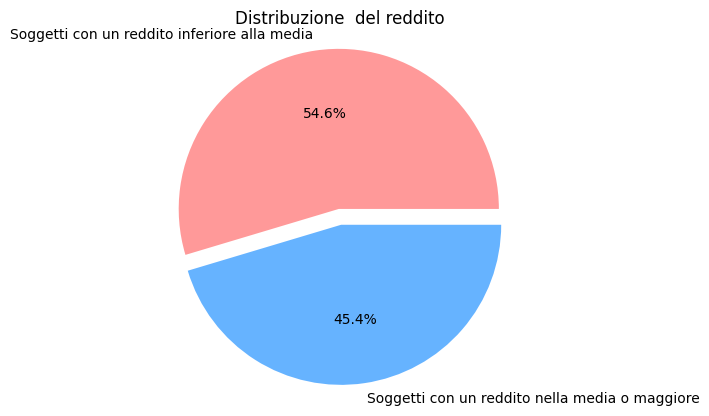

In [37]:
reddito_basso = dataset[dataset['Income'] < 7].shape[0]
reddito_medio = dataset[dataset['Income'] >= 7].shape[0]

plt.pie([reddito_basso, reddito_medio ],explode = (0.1, 0), labels = ['Soggetti con un reddito inferiore alla media', 'Soggetti con un reddito nella media o maggiore'], colors = ['#ff9999','#66b3ff'], autopct='%1.1f%%')
plt.axis('equal')  # Assicura che il grafico sia disegnato come un cerchio

plt.title('Distribuzione  del reddito')
plt.show()

Ora grazie al grafico plot box rappresento graficamente le varie statistiche calcolate in precedenza sulle variabili continue (BMI, GenHlth, MentHlth, PhysHlth, Age, Education, Income): 


Text(0, 0.5, 'Fascia di reddito')

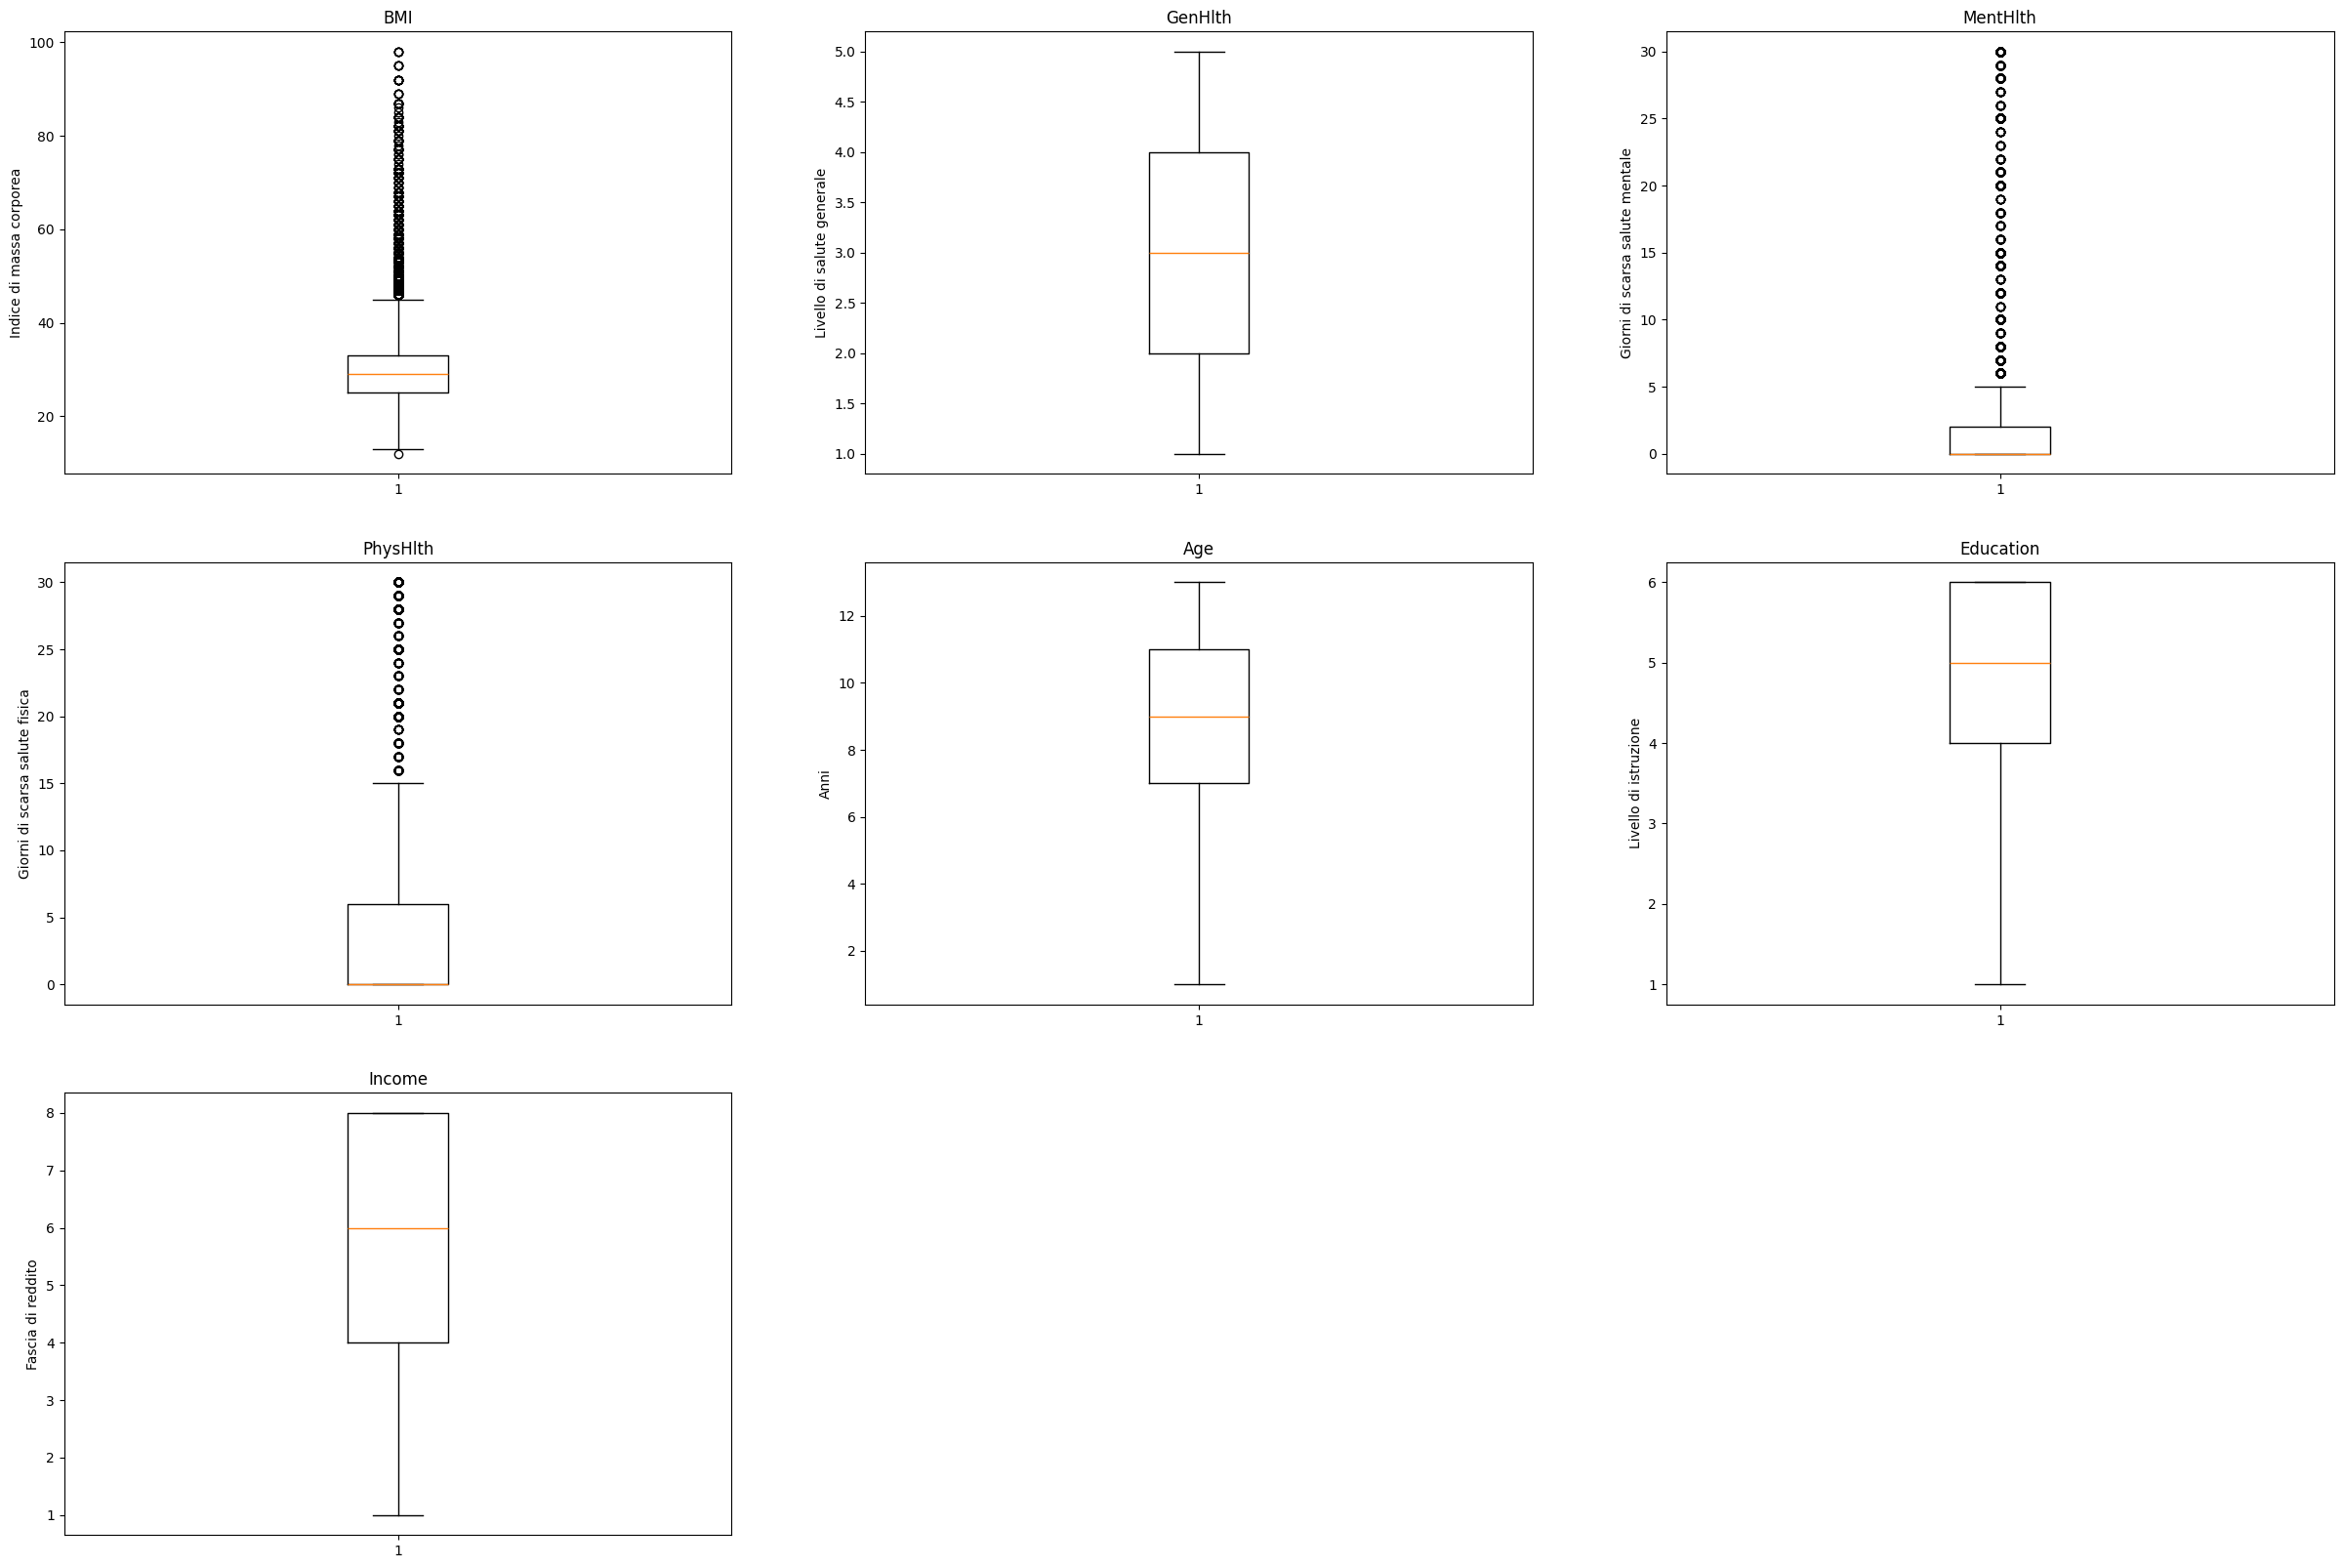

In [39]:
plt.figure(figsize=(30, 20))

plt.subplot(3, 3, 1)
plt.title('BMI')
plt.boxplot(dataset['BMI'])
plt.ylabel('Indice di massa corporea')


plt.subplot(3, 3, 2)
plt.title('GenHlth')
plt.boxplot(dataset['GenHlth'])
plt.ylabel('Livello di salute generale')


plt.subplot(3, 3, 3)
plt.title('MentHlth')
plt.boxplot(dataset['MentHlth'])
plt.ylabel('Giorni di scarsa salute mentale')


plt.subplot(3, 3, 4)
plt.title('PhysHlth')
plt.boxplot(dataset['PhysHlth'])
plt.ylabel('Giorni di scarsa salute fisica')


plt.subplot(3, 3, 5)
plt.title('Age')
plt.boxplot(dataset['Age'])
plt.ylabel('Anni')


plt.subplot(3, 3, 6)
plt.title('Education')
plt.boxplot(dataset['Education'])
plt.ylabel('Livello di istruzione')


plt.subplot(3, 3, 7)
plt.title('Income')
plt.boxplot(dataset['Income'])
plt.ylabel('Fascia di reddito')


